In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [7]:
custom_objects={
    'RandomHeight':tf.keras.layers.RandomHeight,
    'RandomWidth':tf.keras.layers.RandomWidth,
    'RandomZoom':tf.keras.layers.RandomZoom,
    'RandomRotation':tf.keras.layers.RandomRotation,
    'RandomFlip':tf.keras.layers.RandomFlip
}

In [8]:
model = tf.keras.models.load_model("good_model.h5",custom_objects=custom_objects,compile=False)

In [9]:
model.load_weights("weights.weights.h5")

In [10]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, None, None, 1280)    │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │           3,843 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,053,414 (15.46 MB)

 Trainable params: 897,075 (3.42 MB)

 Non-trainable params: 3,156,339 (12.04 MB)

In [49]:
def pred_and_show(model,filepath,class_names=["Bacteria","Normal","Viral"]):
  image = tf.io.read_file(filepath)
  image=tf.io.decode_image(image)
  if image.shape[:-1]==1:
    image=tf.image.grayscale_to_rgb(image)
  image=tf.image.resize(image,size=[224,224])
  pred_probs=model.predict(tf.expand_dims(image,axis=0))
  pred_class=class_names[int(tf.argmax(pred_probs,axis=1))]

  plt.imshow(image/255)
  plt.title(pred_class)

  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


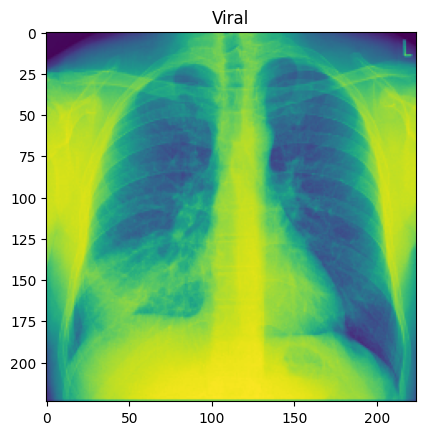

In [50]:
pred_and_show(model=model,filepath="/content/pneumonia.jpeg")